# MY LAB
***


In [508]:
import numpy as np
import matplotlib.pyplot as pltb
import pandas as pd

#### IMPORT DATA
***

In [509]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


#### CLEAN DATA
***

In [510]:
# y is the response variable so let's slice that off
y = dfcars['mpg']

In [511]:
#We have multiple possible X's let's put them aside too, we don't want the first two columns
allX = dfcars.iloc[:, 2:]

In [512]:
allX.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


#### SEPERATE THE DATA 
***

In [513]:
#separate the data into a training set and a test set. We can use train_test_split for this
from sklearn.model_selection import train_test_split

In [514]:
allX_train, allX_test, y_train, y_test = train_test_split(allX, y, test_size=0.2, random_state=42)

#### VALIDATION
***

Cross-validation is a model evaluation technique that helps you measure how well your machine learning model generalizes to unseen data.

Instead of training and testing the model once, cross-validation splits your training data into multiple parts (folds), 
and the model is trained and tested multiple times — each time on a different subset of the data.

In [515]:
from sklearn.linear_model import LinearRegression

In [516]:
from sklearn.model_selection import cross_val_score

In [517]:
# try with one variable "wt"  (model5 0.57)
X_train = allX_train[["wt"]]
X_test = allX_test[["wt"]]

In [518]:
# This performs cross-validation on the linear regression model. 
# It uses the training data: X_train (features) and y_train (target/labels). 

# cross_val_score Splits your training data into k folds (default is 5 folds). 
# It trains the model on k−1 folds, and tests it on the remaining fold, repeating this k times. 

# Each run returns a score (by default, for regression it's R² score — 
# how well the model fits). The result: a list/array of scores, one for each fold.

model5 = LinearRegression()
scores5 = cross_val_score(model5, X_train, y_train)
scores5

array([0.10736385, 0.49488149, 0.86879651, 0.65179584, 0.73272638])

In [519]:
scores5.mean()

0.5711128154689782

In [520]:
# now with two variables (model6 0.63) )
X_train = allX_train[["wt","hp"]]
X_test = allX_test[["wt","hp"]]

In [521]:
model6 = LinearRegression()
scores6 = cross_val_score(model6, X_train, y_train)
scores6

array([0.1262545 , 0.6744817 , 0.76712479, 0.76448681, 0.83404541])

In [522]:
scores6.mean()

0.6332786406507417

In [523]:
# now with three variables (model7 0.65)
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]

In [524]:
model7 = LinearRegression()
scores7 = cross_val_score(model7, X_train, y_train)
scores7.mean()

0.6571279909053493

In [525]:
# again with 3 variables but different ones (model8 0.60)
X_train = allX_train[["wt","hp","carb"]]
X_test = allX_test[["wt","hp","carb"]]

In [526]:
model8 = LinearRegression()
scores8 = cross_val_score(model8, X_train, y_train)
scores8.mean()

0.6036599344425267

In [527]:
# best so far is model7 - A score of .79 for the test set. So let's build that model fully and then evaluate that
X_train = allX_train[["wt","hp","drat"]]
X_test = allX_test[["wt","hp","drat"]]
model7 = LinearRegression()
model7.fit(X_train, y_train)
model7.score(X_test, y_test)

0.7900492843805198

In [528]:
# Goal is to train a Linear Regression model to predict a target (y_train, y_test) using a subset of features ("wt", "hp", and "drat"), 
# and then evaluating how well it performs on test data.

# X_train = allX_train[["wt","hp","drat"]]: You're selecting only 3 specific columns ("wt", "hp", "drat") 
# from your full training data allX_train.X_train will now only contain these three features (variables) for training.

# X_test = allX_test[["wt","hp","drat"]]: Same thing, but for the test set. 
# You're ensuring that both training and testing sets use the same features ("wt", "hp", "drat").

# model7 = LinearRegression(): You're creating a new instance of a Linear Regression model from sklearn.linear_model. 
# At this point, the model is empty — it's just created, not yet trained.

# model7.fit(X_train, y_train):Now you're training the model using the training data:X_train: 
# The input features (wt, hp, drat) & y_train: 
# The target/output you're trying to predict. The model learns the best-fitting line/plane in multidimensional space to predict y.

# model7.score(X_test, y_test): You're now evaluating how well the trained model performs on unseen test data. 
# score() by default returns the R² score (coefficient of determination). R² Score: 
# Measures how well the model predicts the target. 
# The Range: 1.0 = perfect prediction / 0.0 = model does no better than the mean / Negative = model is worse than just guessing the mean

#### POLYNOMIAL REGRESSION EXAMPLE
***

In [529]:
#X_train = allX_train[["wt"]]

*Train with a polynomial feature with an expansion of 2. Order of 2 polynomial. Squared is called a Quadratic polynomial.*

In [530]:
#from sklearn.preprocessing import PolynomialFeatures

In [531]:
# to split the data X_train and the corresponding target values y_train into two sets: one for training and one for validation.
#X_v_train, X_v_valid, y_v_train, y_v_valid = train_test_split(X_train, y_train)

In [532]:
# No of Rows = 18, No of features = 3
#X_v_train.shape

In [533]:
#X_v_train=allX_train[["wt"]]
#X_v_valid=allX_train[["wt"]]

In [534]:
#X_v_train_poly = PolynomialFeatures(2).fit_transform(X_v_train)
#X_v_valid_poly = PolynomialFeatures(2).fit_transform(X_v_valid)

In [535]:
#from sklearn.metrics import mean_squared_error

In [536]:
#modelpoly2 = LinearRegression()
#modelpoly2.fit(X_v_train, y_train)

In [537]:
#print(modelpoly2.score(X_v_train, y_train))
#print(modelpoly2.score(X_v_valid, y_train))

In [538]:
#from sklearn.metrics import mean_squared_error

In [539]:
#degrees = range(1, 6)  #Testing different polynomial degrees 
#train_mean_scores = []  #Stores cross-validation R2 scores for each degree
#test_scores = []        #Stores test set R2 scores for each degree
#error_train = []        #Stores MSE for the training set for each degree
#error_test = []        #Stores MSE for the test set for each degree


In [540]:
#Evaluate each degree by creating a polynomial regression model run cross-validation
#for d in degrees:
    #Calculate the poly features
    #X_train_poly = PolynomialFeatures(d).fit_transform(X_train)
    #X_test_poly = PolynomialFeatures(d).fit_transform(X_test)
    #model = LinearRegression()
    
    #Perform cross-validation on the training set and get the R2 score as above
    #train_scores = cross_val_score(model, X_train_poly, y_train)
    #train_score = train_scores.mean()
    #train_mean_scores.append(train_score)
    
    #Fit the model on the poly training set and score on the poly test set
    #model.fit(X_train_poly, y_train)
    #mse_train = mean_squared_error(model.predict(X_train_poly), y_train)
    #error_train.append(mse_train)    #Record MSE for training set
    #test_score = model.score(X_test_poly, y_test)
    #mse_test = mean_squared_error(model.predict(X_test_poly), y_test)
    #error_train.append(mse_test)    #Record MSE for test set
    #test_scores.append(test_score)
    
    #Display the train and test scores for each degree
    #print(f"Degree {d}: Train CV Mean R^2 Score = {train_score:.3f}, Test R^2 Score = {test_score:.3f}, TRain MSE = {mse_train:.3f}, Test MSE = {mse_test:.3f}")

    

In [541]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [542]:
# Assuming allX_train is already defined and contains the data
X_train = allX_train[["wt"]]  # Feature of interest

In [543]:
# Split the data into training and validation sets
X_v_train, X_v_valid, y_v_train, y_v_valid = train_test_split(X_train, y_train)

In [544]:
# Initialize the PolynomialFeatures transformer (degree 2)
poly_transformer = PolynomialFeatures(degree=2)

In [545]:
# Fit and transform the training set
X_v_train_poly = poly_transformer.fit_transform(X_v_train)

In [546]:
# Use the same transformer to transform the validation set
X_v_valid_poly = poly_transformer.transform(X_v_valid)

In [547]:
# Initialize the linear regression model
modelpoly2 = LinearRegression()


In [548]:
# Train the model on the polynomial transformed training set
modelpoly2.fit(X_v_train_poly, y_v_train)

LinearRegression()

In [549]:
# Evaluate the model on both training and validation sets
train_score = modelpoly2.score(X_v_train_poly, y_v_train)
valid_score = modelpoly2.score(X_v_valid_poly, y_v_valid)

# Print R-squared values
print(f"Training set score: {train_score}")
print(f"Validation set score: {valid_score}")

Training set score: 0.9040873019962811
Validation set score: 0.4805137273527129


Key Changes:

Transform Both X_v_train and X_v_valid with the Same Polynomial Transformer: This ensures consistency between how the model is trained and tested.

Use fit_transform on the training set (X_v_train) to fit and apply the transformation.

Use transform on the validation set (X_v_valid) to apply the same transformation without fitting.

Fit the Model on the Transformed Data (X_v_train_poly), not the original X_v_train. This is crucial because you're trying to train a model that works with the polynomial features, not the original ones.

Explanation:

The issue with getting the same score on both training and validation sets was because the polynomial transformation was being done separately for each set. This can lead to overfitting since the model sees the same transformation on both sets. By transforming both sets with the same fit_transform on the training set and transform on the validation set, you ensure the model is evaluated correctly.

Now, when you run this code, you should see a more reasonable difference between the training and validation scores.

In [550]:
#max_p = 10
#degrees = range(max_p+1)

#error_train = np.empty(len(degrees))
#error_valid = np.empty(len(degrees))
#score_train = np.empty(len(degrees))
#score_valid = np.empty(len(degrees))

In [551]:
#This code snippet is setting up variables to store results from testing different polynomial degrees in a machine learning model. Here's what each variable is for:
degrees = range(1, 6)  #Testing different polynomial degrees 

#train_mean_scores = []  #Stores cross-validation R2 scores for each degree
#test_scores = []        #Stores test set R2 scores for each degree
#error_train = []        #Stores MSE for the training set for each degree
#error_test = []        #Stores MSE for the test set for each degree

error_train = []
error_valid = []
score_train = []
score_valid = []


In [552]:
for d in degrees:
    # Polynomial transformation (fit only on training)
    poly = PolynomialFeatures(degree=d)
    X_c = poly.fit_transform(X_v_train)
    X_c_val = poly.transform(X_v_valid)

    # Fit model
    model = LinearRegression()
    model.fit(X_c, y_v_train)

    # Predictions
    y_train_pred = model.predict(X_c)
    y_val_pred = model.predict(X_c_val)

    # MSE
    error_train.append(mean_squared_error(y_v_train, y_train_pred))
    error_valid.append(mean_squared_error(y_v_valid, y_val_pred))

    # R² Score
    score_train.append(model.score(X_c, y_v_train))
    score_valid.append(model.score(X_c_val, y_v_valid))

In [553]:
#best_degree = np.argmin(error_valid)
#print(f"Best polynomial degree (based on validation error): {best_degree}")
#Display the train and test scores for each degree
#print(f"Degree {d}: Train CV Mean R^2 Score = {train_score:.3f}, Test R^2 Score = {test_score:.3f}, TRain MSE = {mse_train:.3f}, Test MSE = {mse_test:.3f}")

In [554]:
# Find the index of the best degree based on lowest validation error
best_idx = np.argmin(error_valid)
best_degree = list(degrees)[best_idx]

# Print the best degree
print(f"✅ Best polynomial degree (based on validation MSE): {best_degree}")
print(f"Validation MSE at degree {best_degree}: {error_valid[best_idx]:.3f}")
print()

✅ Best polynomial degree (based on validation MSE): 2
Validation MSE at degree 2: 13.892



In [555]:
for i, d in enumerate(degrees):
    print(
        f"Degree {d}: "
        f"Train R² = {score_train[i]:.3f}, "
        f"Validation R² = {score_valid[i]:.3f}, "
        f"Train MSE = {error_train[i]:.3f}, "
        f"Validation MSE = {error_valid[i]:.3f}"
    )

Degree 1: Train R² = 0.874, Validation R² = -0.069, Train MSE = 4.625, Validation MSE = 28.575
Degree 2: Train R² = 0.904, Validation R² = 0.481, Train MSE = 3.508, Validation MSE = 13.892
Degree 3: Train R² = 0.911, Validation R² = -4.692, Train MSE = 3.256, Validation MSE = 152.209
Degree 4: Train R² = 0.918, Validation R² = -15.092, Train MSE = 3.001, Validation MSE = 430.339
Degree 5: Train R² = 0.932, Validation R² = -927.331, Train MSE = 2.490, Validation MSE = 24825.837


Explanation:

Step	Purpose

poly.fit_transform(X_v_train)	Fit polynomial basis and transform training data

poly.transform(X_v_valid)	Transform validation data using same basis (no leakage)

LinearRegression().fit(...)	Fit linear regression to polynomial-transformed features

mean_squared_error(...)	Store MSE for training and validation sets

est.score(...)	Store R² scores for training and validation sets

In [556]:
import matplotlib.pyplot as plt
import numpy as np

In [558]:
# Find the degree with minimum validation error
#best_degree = np.argmin(error_valid)
#min_val_error = error_valid[best_degree]

# Plot training and validation errors
#plt.figure(figsize=(10, 6))
#plt.plot(degrees, error_train, label='Training Error', marker='o')
#plt.plot(degrees, error_valid, label='Validation Error', marker='o')

# Highlight the best degree on the plot
#plt.axvline(x=best_degree, color='red', linestyle='--', label=f'Best Degree = {best_degree}')
#plt.scatter([best_degree], [min_val_error], color='red', zorder=5)
#plt.text(best_degree + 0.3, min_val_error, f"Val Error: {min_val_error:.3f}", color='red')

# Plot settings
##plt.xlabel("Polynomial Degree")
#plt.ylabel("Mean Squared Error")
#plt.title("Training and Validation Error vs Polynomial Degree")
#plt.legend()
#plt.grid(True)
#plt.tight_layout()
#plt.show()

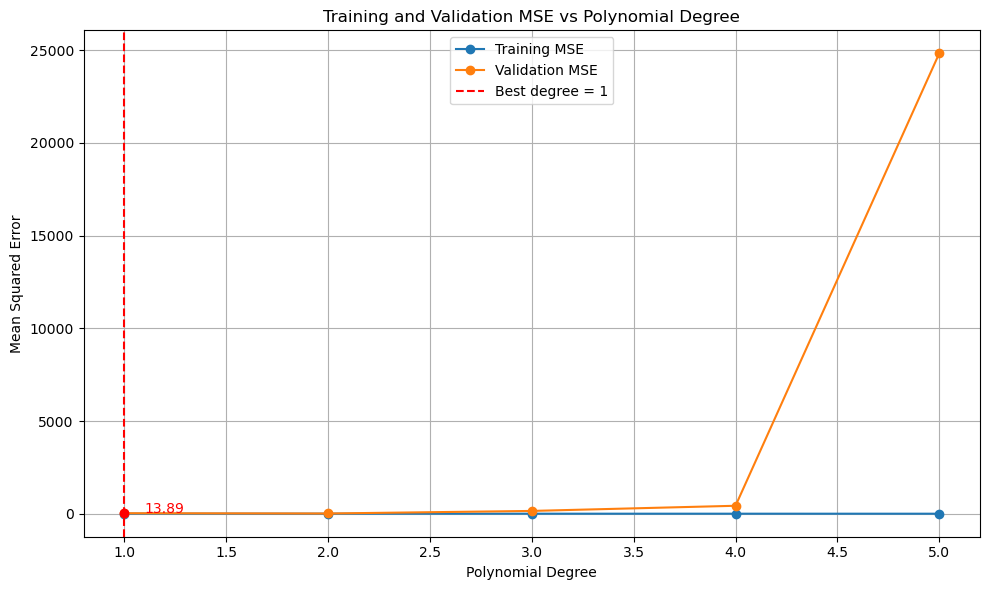

In [559]:
plt.figure(figsize=(10,6))
plt.plot(degrees, error_train, marker='o', label="Training MSE")
plt.plot(degrees, error_valid, marker='o', label="Validation MSE")
plt.axvline(x=best_degree, color='red', linestyle='--', label=f"Best degree = {best_degree}")
plt.scatter(best_degree, error_valid[best_idx], color='red', zorder=5)
plt.text(best_degree + 0.1, error_valid[best_idx], f"{error_valid[best_idx]:.2f}", color='red')

plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation MSE vs Polynomial Degree")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()